In [1]:
from src import PickleManager
from src import Resolution
from src import ipynb_display_image

pm = PickleManager(directory="./pickle_data", verbose=True)

# Loading the scene and rendering with the blinn-phong tracer at different resolutions

Now we can load the scene and render a preview at a chosen resolution (144p here for speed)

In [2]:
scene = pm.load_scene("spheres")

Loaded object from pickle_data/scene_spheres.pkl
Scene(world=<src.geometry.world.World object at 0x107b9e360>, camera=Camera(fov=60, resolution=<Resolution.R144p: (256, 144)>, origin=Vec3(0.000, 1.000, 3.000), direction=Vec3(0.000, -0.050, -0.999), up_hint=Vec3(0.000, 1.000, 0.000)), lights=[AmbientLight(intensity=0.0, position=Vec3(1.000, 1.000, -3.000), falloff=1.0, type=<LightType.AMBIENT: 'ambient'>), PointLight(intensity=2000.0, position=Vec3(5.000, 5.000, 2.000), falloff=0.1, type=<LightType.POINT: 'point'>), PointLight(intensity=2000.0, position=Vec3(-5.000, 5.000, 2.000), falloff=0.1, type=<LightType.POINT: 'point'>), PointLight(intensity=2000.0, position=Vec3(0.000, 5.000, -5.000), falloff=0.1, type=<LightType.POINT: 'point'>)])


Phong render saved to images/phong.png
Rendered image saved to images/phong.png


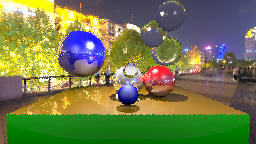

Using skybox: ./skybox/shanghai_4k.hdr
Rendering fast at resolution Resolution.HD with FOV 60 and samples_per_pixel=6, max_depth=8
No progress bar in multithreaded mode - switch to other render method for that if needed - this is supposed to be fast!
------------------------------------------------------------
Using 8 CPU cores for rendering.
------------------------------------------------------------


In [ ]:
scene.set_camera_resolution(Resolution.R144p)
png = scene.render_phong(
    samples_per_pixel=1,
    max_depth=20,
    image_png_path="./images/phong.png"
)

print(f"Rendered image saved to {png}")

ipynb_display_image(png)

# multithreaded renderer doesnt show progress because of speed
scene.set_camera_resolution(Resolution.HD)
png_hd = scene.render_multithreaded(
    samples_per_pixel=6,
    max_depth=8,
    image_png_path="./images/phong_hd.png"
)

# single thread renderer
ipynb_display_image(png_hd)
png_hd = scene.render_phong(
    samples_per_pixel=6,
    max_depth=8,
    image_png_path="./images/phong_hd.png"
)

ipynb_display_image(png_hd)